In this tutorial, we are going to discuss the various R functions that can be used to perform **nonparametric** tests that we have learned in class.

Remember that nonparametric tests are used as an alternative to parametric tests when the assumptions of the latter are not met. Here is a summary of the nonparametric tests that can be used as an alternative to the tests covered in this course:

- Parametric: `t.test` $\longleftrightarrow$ Nonparametric: `wilcox.test`
- Parametric: `aov` $\longleftrightarrow$ Nonparametric: `kruskal.test`
- Parametric: `cor.test(...,  method = "pearson")` $\longleftrightarrow$ Nonparametric: `cor.test(...,  method = "spearman")`

# Wilcoxon rank-sum  and signed-rank tests

The **Wilcoxon rank-sum test** is a nonparametric alternative to the **t-test** (one and two-sample). In the case of two samples, it is generally used to determine if they have the same distribution or not, based on their rank order. In some special cases, when both distributions have the same shape and only differ in their location, the test can be referred to as a test of the difference in medians.

Similarly, for the two-sample case, the Wilcoxon rank-sum test is also known as the **Mann-Whitney U test**, and both terms are often used interchangeably.

In the case of two paired samples, the **Wilcoxon signed-rank test** is an alternative to the **paired-sample t-test**.

In R, we can perform both nonparametric tests using the `wilcox.test` built-in function.

In [1]:
?wilcox.test

- If only one vector is supplied, we would run a one-sample Wilcoxon rank-sum test.
- If two vectors are supplied instead, we would run a two-sample rank-sum test.- 
- In this last case, if we set the argument *paired* to TRUE, we would be assuming that both samples are paired, and it would correspond to the Wilcoxon signed-rank test.

Let's show the use of this function by means of the following datasets:

In [2]:
library(tidyverse)

set.seed(1234)
sample.1<-rnorm(15, 110, 15)
sample.2<-rnorm(15, 124, 15)

well.data<-rbind(data.frame(iq=sample.1, group="standard"),
                 data.frame(iq=sample.2, group="hyper IQ"))
well.data$type<-"well"

outlier.data<-rbind(data.frame(iq=sample.1, group="standard"),
                    data.frame(iq=c(sample.2, 30), group="hyper IQ"))
outlier.data$type<-"outlier"

ranksum.dat<-rbind(well.data, outlier.data)
ranksum.dat$type<-as.factor(ranksum.dat$type)
ranksum.dat$type<-relevel(ranksum.dat$type, "well")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Both datasets are the same, with the only difference being that in the "outlier" dataset, we have added one outlier to the Hyper IQ group:

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


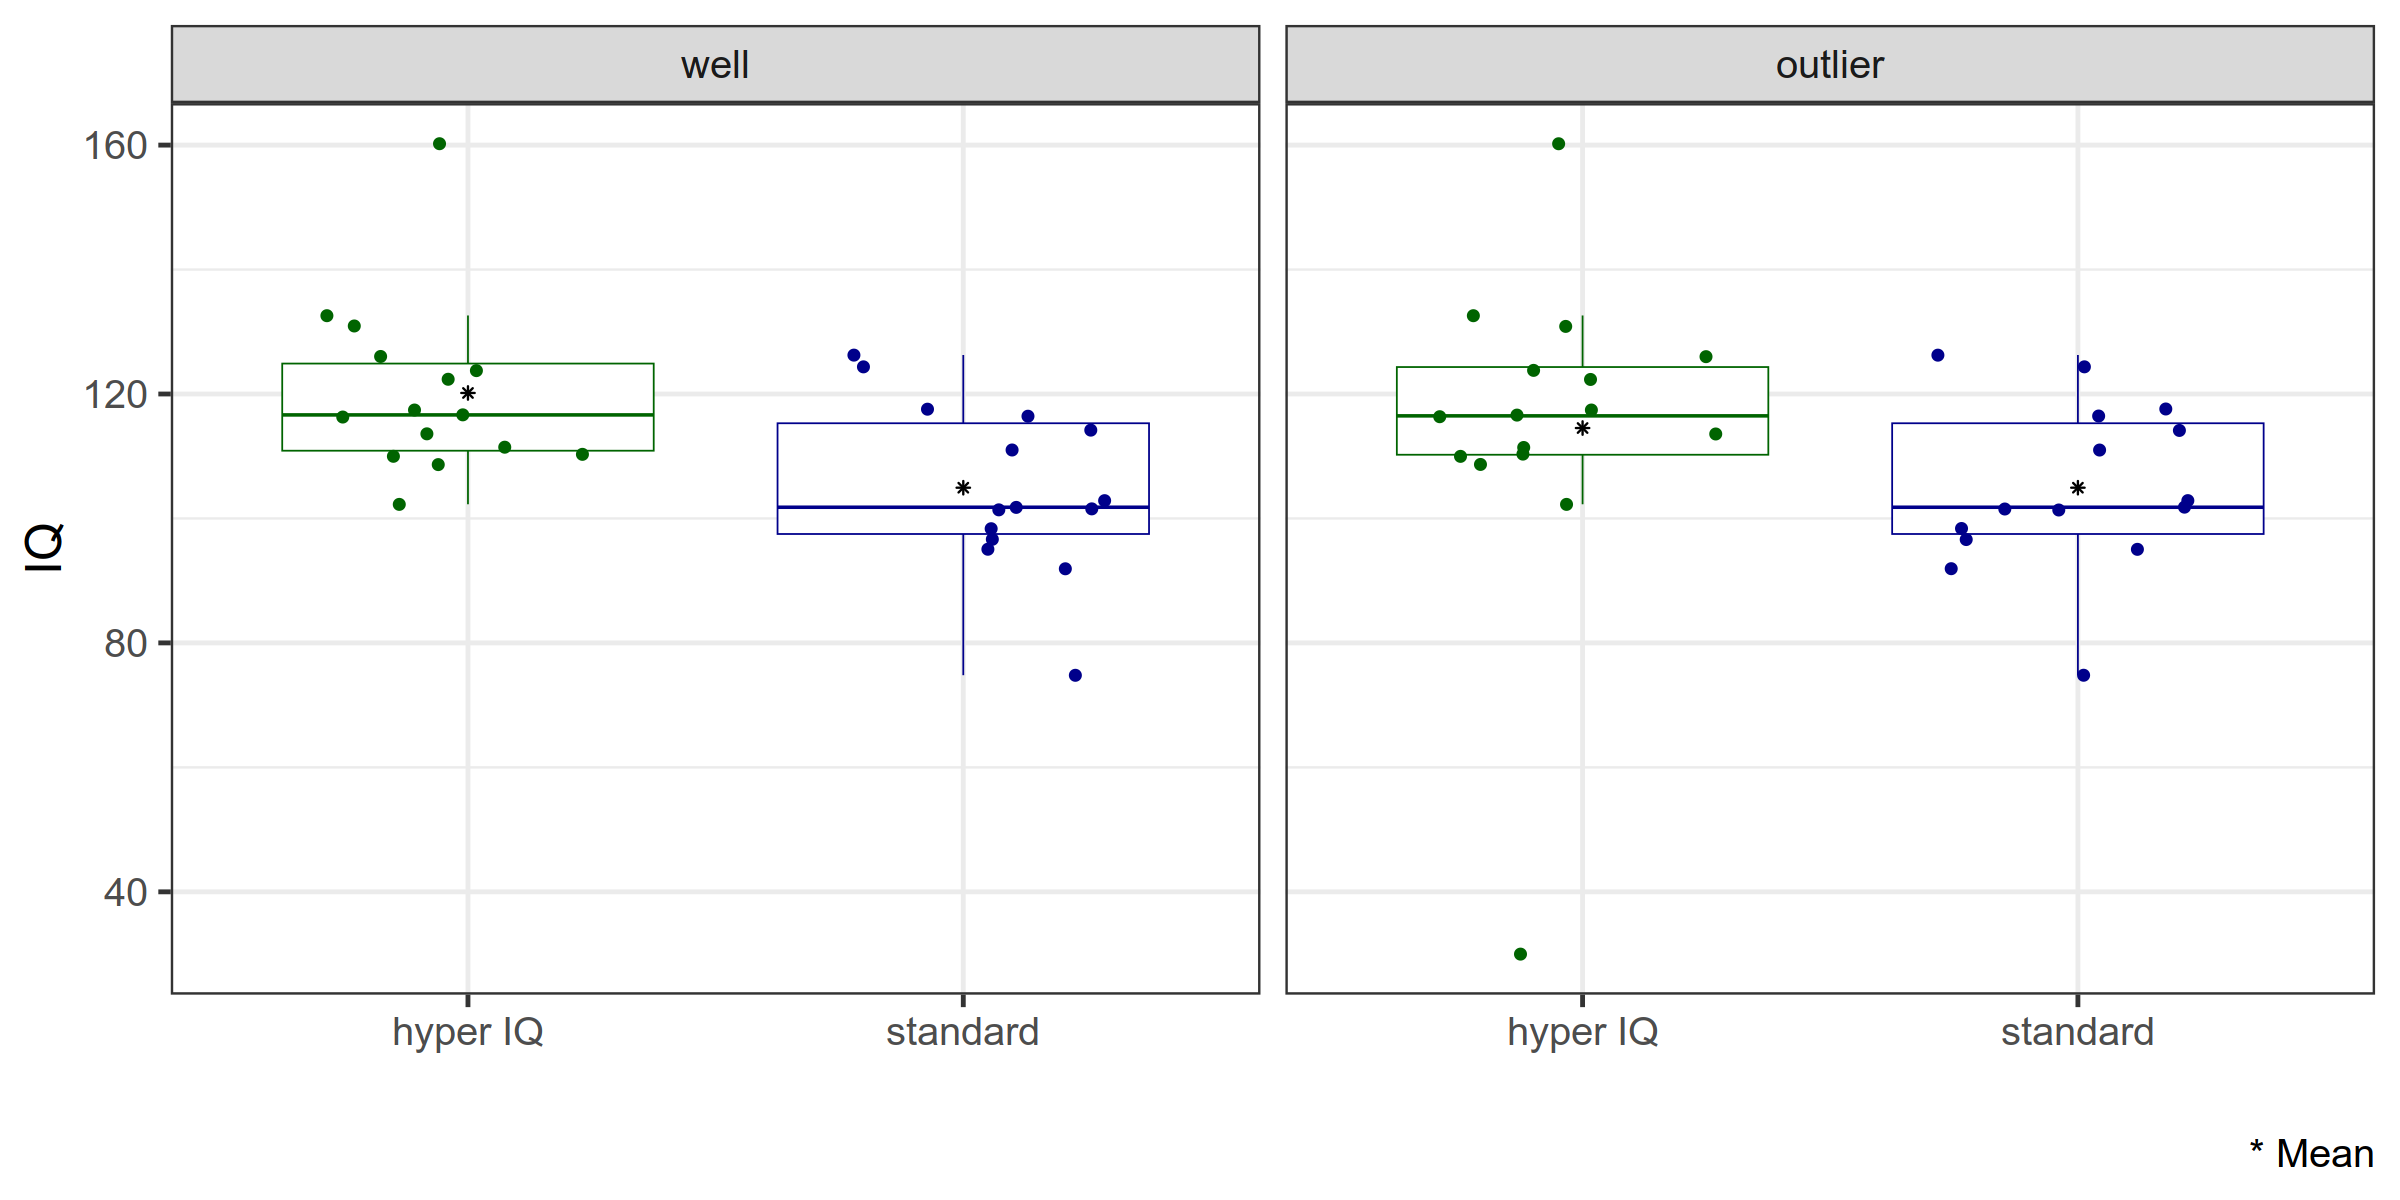

In [3]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(ranksum.dat, 
       aes(x = group,
           y = iq,
           color = group)) +
  geom_boxplot(outlier.color = NA) +
  geom_jitter(size = 3, width = 0.3) +
  stat_summary(fun = "mean",
    color = "black", shape = 8) +
  scale_color_manual(values =
        c("darkgreen", "darkblue"),
        guide = NULL) +
  labs(x = "",
       y = "IQ",
       caption = "* Mean") + theme_bw(30) + facet_grid(~type)

Since we generated the data from a Gaussian distribution, we can use the two-sample t-test to test whether there are significant differences in means:

In [4]:
t.test(iq~group, data = well.data, var.equal = TRUE)


	Two Sample t-test

data:  iq by group
t = 3.0282, df = 28, p-value = 0.005238
alternative hypothesis: true difference in means between group hyper IQ and group standard is not equal to 0
95 percent confidence interval:
  4.926668 25.525651
sample estimates:
mean in group hyper IQ mean in group standard 
              120.1667               104.9405 


As we can see, at the usual Type I error rate of $\alpha=0.05$, we reject the null hypothesis that both groups have similar means in IQ.

Now, let's see what happens if we use the same test on the dataset contaminated with one outlier:

In [5]:
t.test(iq~group, data = outlier.data, var.equal = TRUE)


	Two Sample t-test

data:  iq by group
t = 1.2637, df = 29, p-value = 0.2164
alternative hypothesis: true difference in means between group hyper IQ and group standard is not equal to 0
95 percent confidence interval:
 -5.930769 25.112250
sample estimates:
mean in group hyper IQ mean in group standard 
              114.5313               104.9405 


Now the p-value is greater than 0.05, so we should stick to the null hypothesis, even though our data seemed to indicate that both groups differ in their IQ values!!! What is happening here is that the presence of the outlier is contaminating the estimation of the mean, and this is affecting the t-test since it is a test on the means. 

Let's see what happens if we instead run a Wilcoxon rank-sum test.

In [6]:
wilcox.test(iq~group, data = outlier.data)


	Wilcoxon rank sum exact test

data:  iq by group
W = 175, p-value = 0.02975
alternative hypothesis: true location shift is not equal to 0


Since this test uses ranks instead of the actual observed values, it is not as sensitive to outliers and allows us to reject the null hypothesis, as we expected.

<div class="alert alert-info"> <b>Practice</b>: The dataset in <a href="https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/drug_depression.csv"> https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/drug_depression.csv </a> contains information about the levels of depression of several participants measured through the Beck Depression Inventory (BDI) on two different days (Sunday and Wednesday) after taking either ecstasy or alcohol. In this dataset, the column <i> Drug</i> is a categorical variable indicating which drug the participants took, and <i> BDI_sunday</i> and <i> BDI_wednesday</i> represent the measured levels of depression on sunday and wednesday respectively.
    
Use either a Wilcoxon rank-sum or a Wilcoxon signed-rank test to show:
    <ol>
    <li> If there are differences in depression levels measured on sunday and wednesday between both groups.
        <li> If there are differences in depression levels between both days in the "Ecstasy" group.
            <li> If there are differences in depression levels between both days in the "Alcohol" group.
        </ol>
    
In all cases, assume a type I error rate $\alpha=0.05$ to conclude whether we reject the null or not.

In [8]:
# Your response here and below using more cells

# Kruskal-wallis test

The **Kruskal-Wallis test** is the nonparametric alternative to **ANOVA** and tests whether two or more groups of data come from the same distribution. It can be used, for example, when the data are not normally distributed and small sample sizes or the data are ordinal or interval.

In R, we can run the Kruskal-Wallis test using the `kruskal.test` function. 

In [9]:
?kruskal.test

Let's generate some data for this part of the tutorial, consisting of values for three different groups:

In [10]:
set.seed(1234)
# Generate random data for group 1 with mean 10 and standard deviation 2
anova.data.good<-rbind(data.frame(value=rnorm(10, mean = 8, sd = 2), group='a'),
                       data.frame(value=rnorm(10, mean = 11, sd = 2), group='b'), 
                       data.frame(value=rnorm(10, mean = 10.5, sd = 2),  group='c'))

Warning message:
“Removed 3 rows containing missing values (`geom_segment()`).”


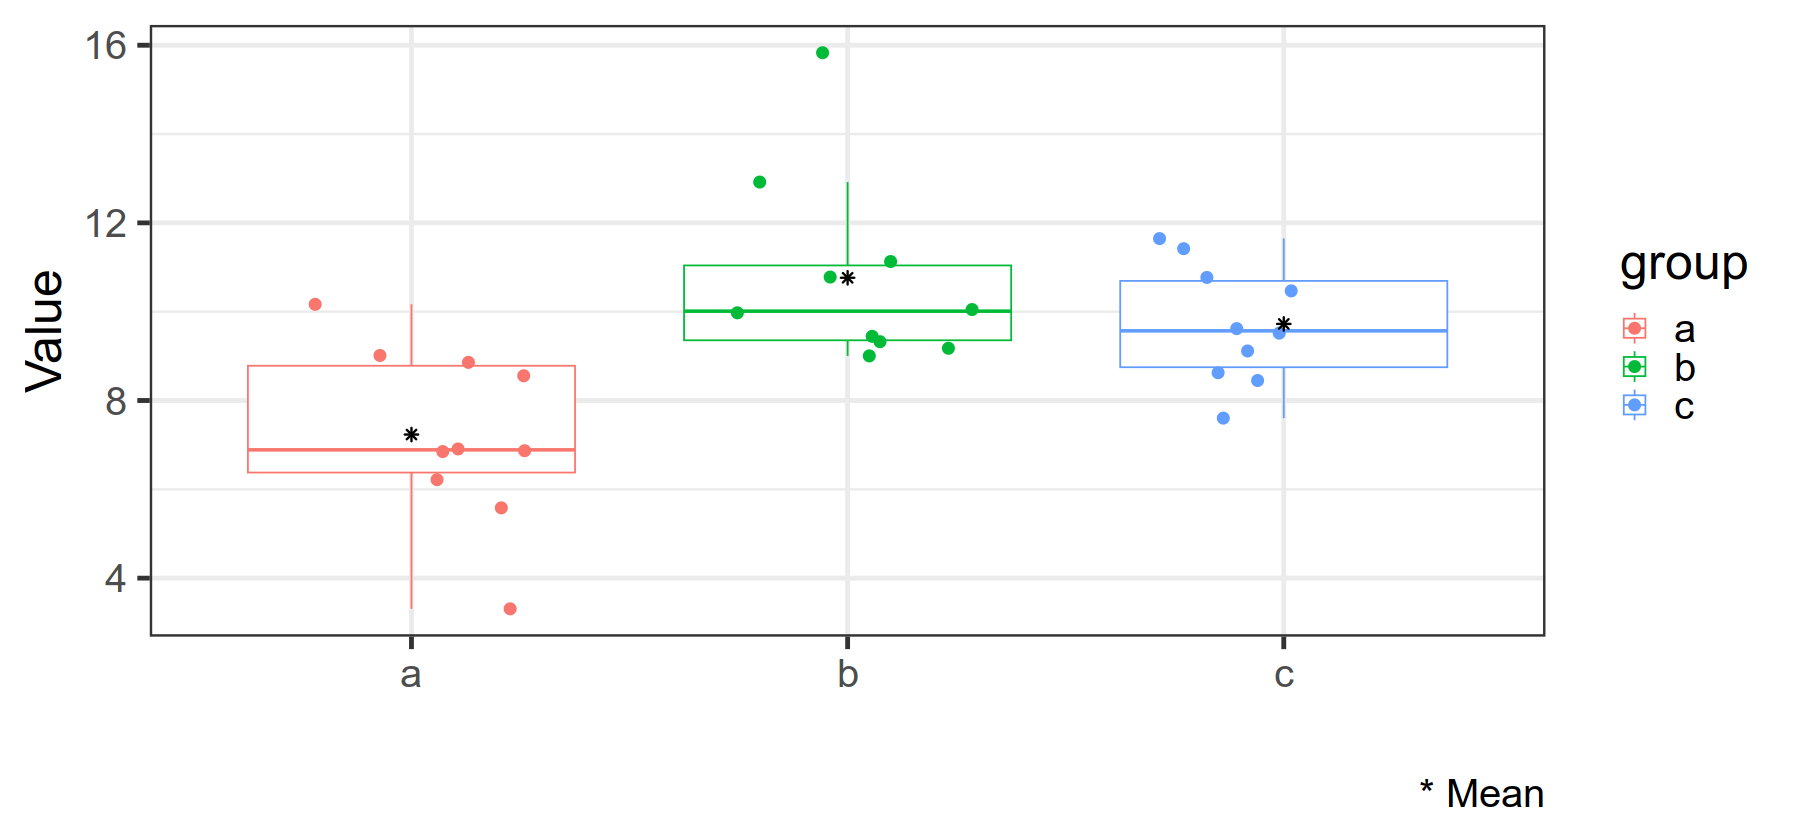

In [11]:
library(tidyverse)

options(repr.plot.width=15, repr.plot.height=7)

ggplot(anova.data.good, 
       aes(x = group,
           y = value,
           color = group)) +
  geom_boxplot(outlier.color = NA) +
  geom_jitter(size = 3, width = 0.3) +
  stat_summary(fun = "mean",
    color = "black", shape = 8) +
  labs(x = "",
       y = "Value",
       caption = "* Mean") + theme_bw(30)

If we run an ANOVA test and assuming $\alpha=0.05$, we should reject the null that the three groups have a similar mean:

In [12]:
summary(aov(value~group, data = anova.data.good))

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  65.81   32.91   9.587 0.000715 ***
Residuals   27  92.68    3.43                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Let's see again what happens if we add an outlier to one of the groups and run the ANOVA test again:

In [13]:
anova.data.outlier<-rbind(anova.data.good, 
                          data.frame(value=50, group="a")) # Here we are adding an outlier to group a
tail(anova.data.outlier)

,value,group
,<dbl>,<chr>
26,7.603590,c
27,11.649511,c
28,8.452689,c
29,10.469723,c
30,8.628103,c
31,50.000000,a


Warning message:
“Removed 3 rows containing missing values (`geom_segment()`).”


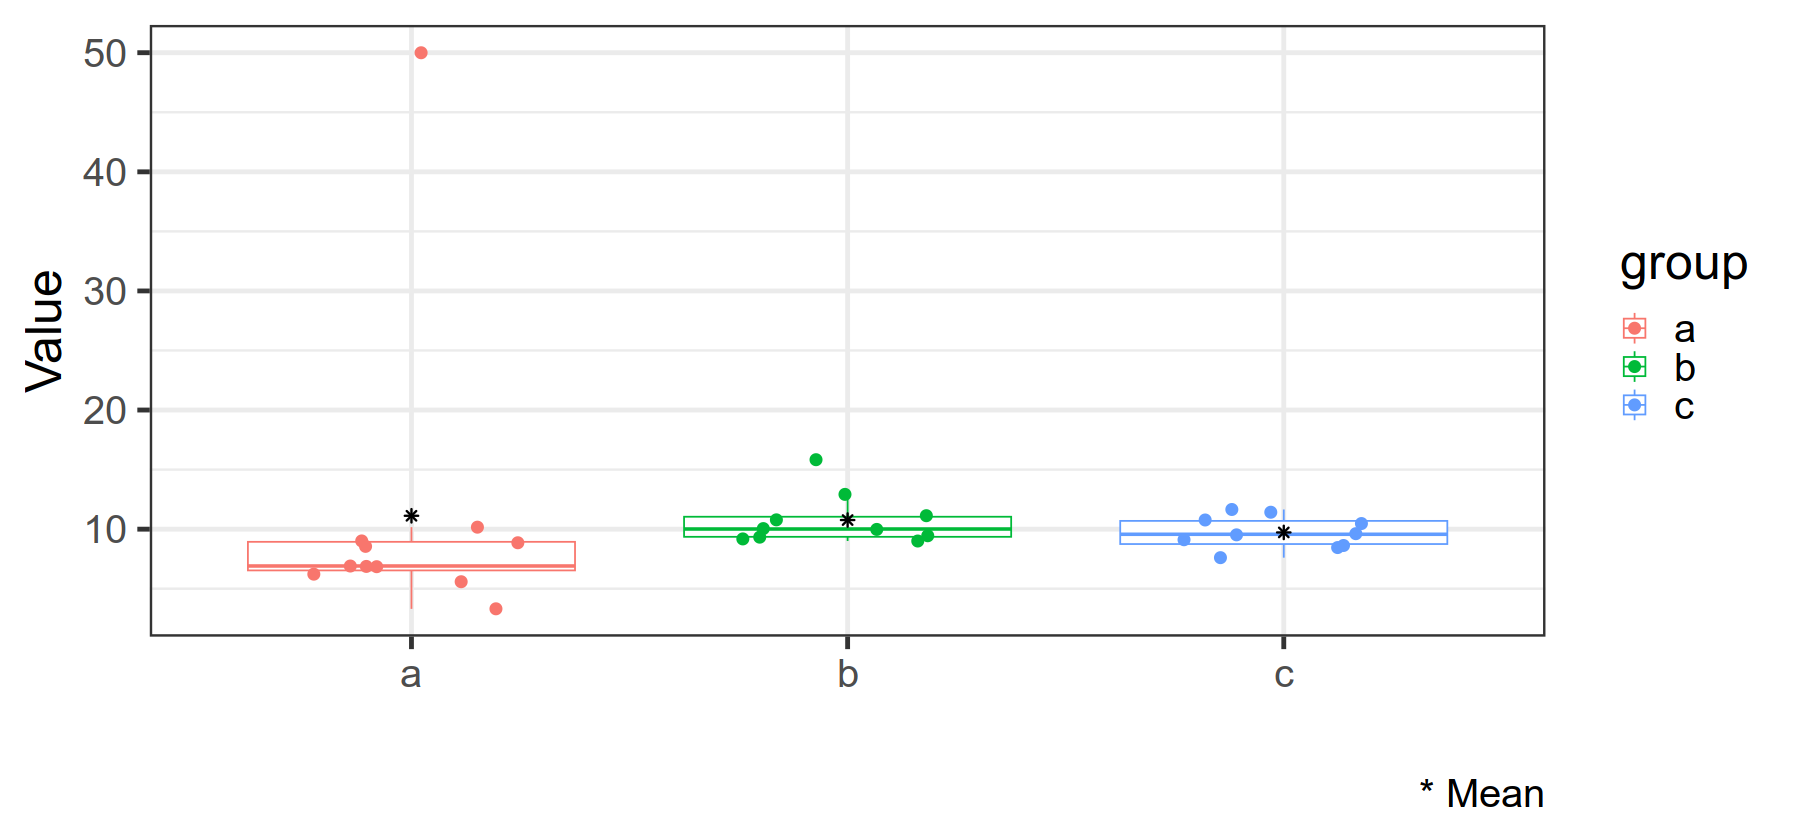

In [14]:
options(repr.plot.width=15, repr.plot.height=7)

ggplot(anova.data.outlier, 
       aes(x = group,
           y = value,
           color = group)) +
  geom_boxplot(outlier.color = NA) +
  geom_jitter(size = 3, width = 0.3) +
  stat_summary(fun = "mean",
    color = "black", shape = 8) +
  labs(x = "",
       y = "Value",
       caption = "* Mean") + theme_bw(30)

In [15]:
summary(aov(value~group, data = anova.data.outlier))

            Df Sum Sq Mean Sq F value Pr(>F)
group        2   10.9    5.43   0.087  0.917
Residuals   28 1755.4   62.69               

As we can see, just one outlier can completely change our conclusion! 

However, if we know about the existence of this outlier, we could try running a Kruskal-Wallis test, which should be less sensitive to such points.

As we said before, in R we can run the Kruskal-Wallis test using the `kruskal.test` function. We could use the formula syntax like with `aov`:

In [16]:
kruskal.test(value~group, data = anova.data.outlier)


	Kruskal-Wallis rank sum test

data:  value by group
Kruskal-Wallis chi-squared = 8.774, df = 2, p-value = 0.01244


or by passing the vector of values to the first argument, and the vector with the group assignments to the second argument:

In [17]:
kruskal.test(anova.data.outlier$value, anova.data.outlier$group)


	Kruskal-Wallis rank sum test

data:  anova.data.outlier$value and anova.data.outlier$group
Kruskal-Wallis chi-squared = 8.774, df = 2, p-value = 0.01244


In either case, we can see that assuming $\alpha=0.05$, we can now reject the null hypothesis that the distributions of points are similar among the three groups. This is consistent with the result obtained earlier without the outlier using ANOVA.

<div class="alert alert-info"> <b>Practice</b>: A psychologist is interested in whether reaction times differ across three different experimental conditions. Participants are randomly assigned to one of the three conditions, and their reaction times are recorded. The dataset can be found in <a href="https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/reaction_times_experiment.csv"> https://raw.githubusercontent.com/jrasero/cm-85309-2023/main/datasets/reaction_times_experiment.csv </a>.

Use a Kruskal-Wallis test to assess whether there are statistical differences in the distributions of reaction times among the three experimental conditions, assuming a type I error rate of $\alpha=0.05$. As a follow-up, determine which pairs of experimental conditions differ in terms of these reaction times?

In [18]:
# Your response here and below using more cells

# Spearman's correlation test

The **Spearman's correlation**, $\rho$, is a measure used to determine the strength and direction of the association between two variables. It measures the monotonic relationship between two variables, which means that variables increase or decrease but not necessarily at a constant rate. As a result, it is suitable as an alternative to the **Pearson's correlation** when the relationship is non-linear.

The Spearman's correlation coefficient, $\rho$, is just the Pearson's correlation between the ranks of each variable separately, instead of between the actual data. As a result, it is also suitable when the data are ordinal or in the presence of outliers.

Once the the Pearson's correlation between the ranks are calculated, the significance of the association is determined by first transforming this correlation to a t-statistic. Then, the p-value is calculated using the t-distribution, similar to how it is done for Pearson's correlation.

In R, testing the association between two variables using the Spearman's correlation can be done using the `cor.test` function, but setting the argument *method* equal to "spearman".

`geom_smooth()` using formula = 'y ~ x'


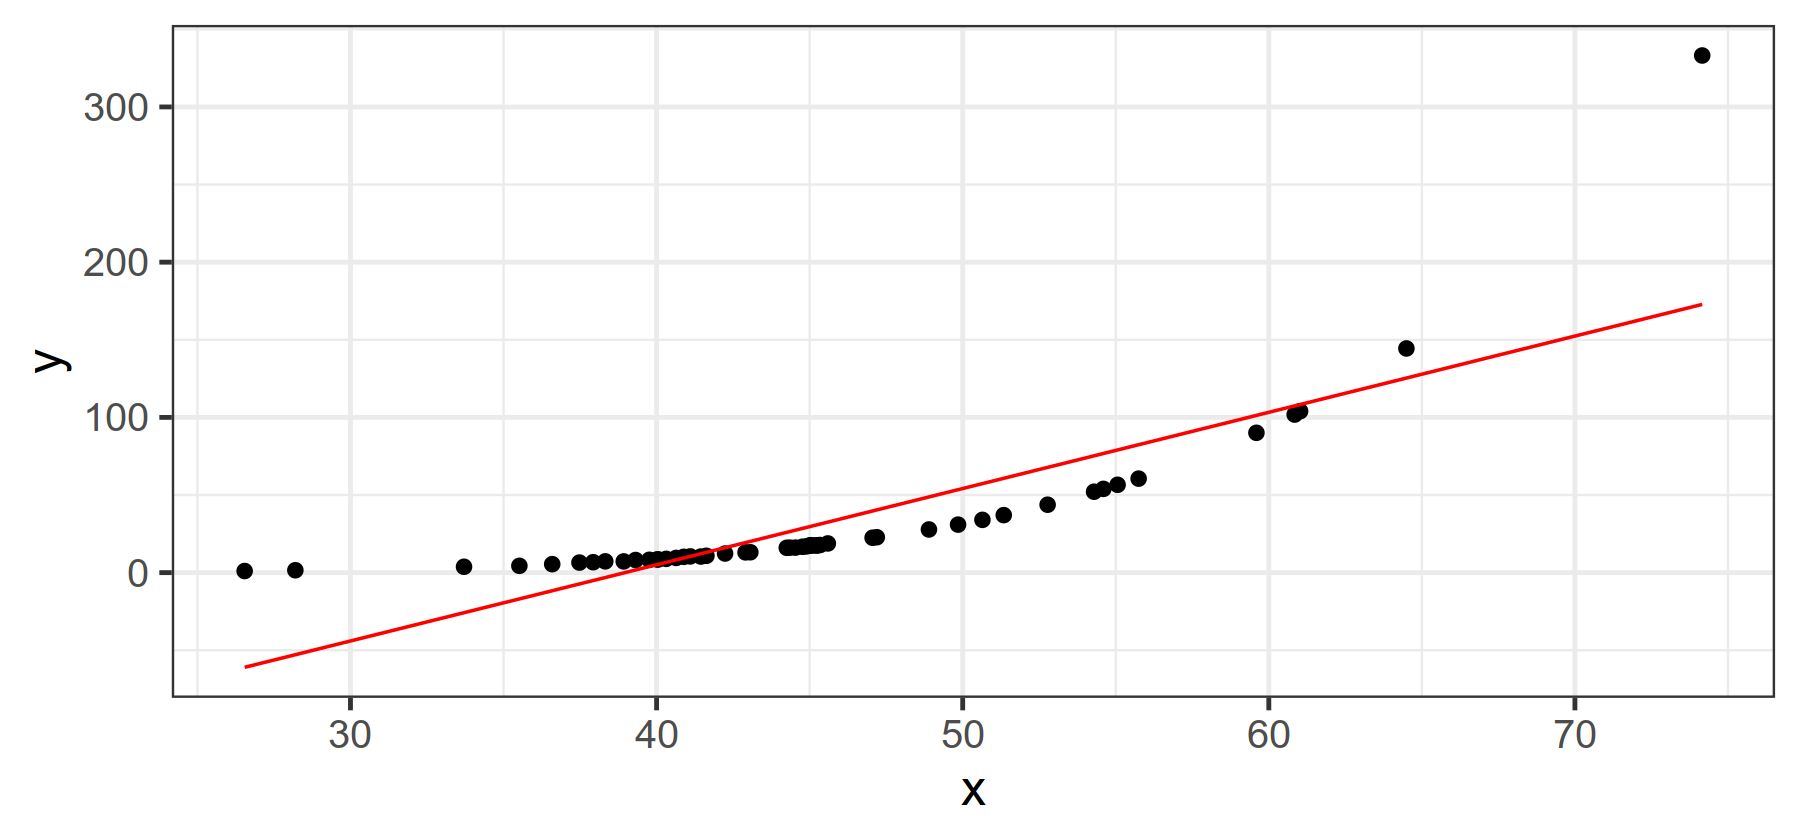

In [19]:
set.seed(1234)
x <- rnorm(50, mean = 50, sd = 10)
y <- (x^6/1000000) + sample(c(100:500), 50, replace = TRUE)
y<-y/500

library(tidyverse)

options(repr.plot.width=15, repr.plot.height=7)

ggplot(data.frame(x=x,y=y), 
       aes(x = x,
           y = y)) +
geom_point(size=4) + geom_smooth(method="lm", color="red", se=FALSE) + 
  labs(x = "x", y = "y") + theme_bw(30)

This is clearly a nonlinear relationship. We can see that using the Pearson's correlation and the Spearman's correlation give different results. 

In [20]:
cor.test(x,y, method = "pearson")
cor.test(x,y, method = "spearman")


	Pearson's product-moment correlation

data:  x and y
t = 10.23, df = 48, p-value = 1.198e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7142349 0.8991103
sample estimates:
      cor 
0.8279763 



	Spearman's rank correlation rho

data:  x and y
S = 18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9991357 


As we can see, the Pearson's correlation underestimated the association between both variables. This is because Pearson's correlation measures the **linear** relationship between variables, but here we have a non-linear relationship.

Finally, let's show that Spearman's correlation it is just the Pearson's correlation on the ranks instead of on the actual data:

In [21]:
# Pearson's correlation test on the ranks, instead of on the actual data
cor.test(rank(x), rank(y),  method = "pearson")


	Pearson's product-moment correlation

data:  rank(x) and rank(y)
t = 166.53, df = 48, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9984694 0.9995120
sample estimates:
      cor 
0.9991357 


<div class="alert alert-info"> <b>Practice</b>: Does the number of cylinders correlate with the number of forward gears in cars? Test this using the variable `mtcars`, which is a native R dataset that contains a data frame comprising fuel consumption and 10 aspects of automobile design and performance for 32 automobiles. The number of cylinders in this data frame is located in the column "cyl", whereas the number of forward gears corresponds to "gear". Since both variables could be considered ordinal (at least "gear", i.e. we can't have two and half forward gears), then Spearman's correlation seems more appropriate than Pearson's correlation for testing the association between.
    
Is this association significant at a significance level of $\alpha=0.05$?

In [22]:
# Your response here